In [ ]:
Подключение библиотек и загрузка таблиц

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import Ridge
import pickle

In [16]:
# Импорт основных библиотек
import numpy as np
import binascii 
import pandas as pd
from sklearn.linear_model import LinearRegression
# Импорт библиотек построения графиков и диаграмм
from matplotlib import pyplot as plt
import seaborn as sns

# Указание режима отображения диаграмм
%matplotlib inline

# Импорт основных библиотек машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler

# Импорт библиотек моделей машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Импорт библиотек отбора признаков
from sklearn.feature_selection import RFE

# Импорт библиотек оценки моделей машинного обучения
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


test = pd.read_csv('/content/test.csv')
users = pd.read_csv('/content/01_all_users.csv')
eventslog = pd.read_csv('/content/02_events_log.csv')
lkeventslog = pd.read_csv('/content/03_lk_events_log.csv')
blocked = pd.read_csv('/content/04_is_blocked.csv')


In [ ]:
Объединяем таблицы

In [5]:
tabletwo= pd.merge(users,blocked, left_on='contract_id', right_on='contract_id')

In [ ]:
Создаём модель

In [4]:
model = LinearRegression()

In [ ]:
Загружаем данные для тренировки

In [10]:
X = tabletwo[['day_or_month_contract']]
Y = tabletwo.blocked

Тренируем модель

In [14]:
model.fit(X, Y)


LinearRegression()

In [ ]:
Загружаем данные тестовой таблицы

In [19]:
tablethree= pd.merge(users,test, left_on='contract_id', right_on='contract_id')
y = tablethree[['day_or_month_contract']]


Точность модели

In [41]:
print(model.score(X, Y))

0.00020558623158950518


Сохраняем модель

In [192]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

Строим ROC AUC

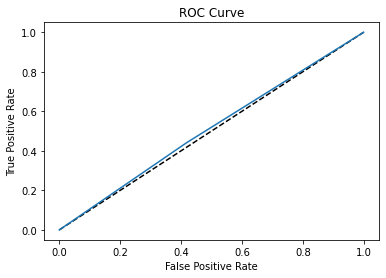

In [74]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict(tabletwo[['day_or_month_contract']])

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(tabletwo[['blocked']], y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [176]:
tablethree.head()

print(tablethree[0:1])

   contract_id  day_or_month_contract  blocked
0       268331                      0      NaN


Заполняем таблицу

In [187]:
id=0
for id,row in tablethree.iterrows():
  result= tablethree.loc[(tablethree.contract_id == row.contract_id )]
  predict = model.predict(result[['day_or_month_contract']])
  if(predict[0] > 0.11):
    tablethree.at[id, 'blocked']=1
  else:
    tablethree.at[id, 'blocked']=0


Сохраняем файл

In [189]:
with open('test.csv', 'w') as csv_file:
    tablethree.to_csv(path_or_buf=csv_file)